In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
x = pd.read_csv('train_features.csv', sep=',', index_col = 0, header = 0)
y = pd.read_csv('train_target.csv', sep=',', index_col = 0, header = 0)
x_pred = pd.read_csv('test_features.csv', sep=',', index_col = 0, header = 0)

print(x.shape)
print(y.shape)
print(x_pred.shape)

time_step = int(x.shape[0] / y.shape[0])
tmp = []
for i in range(int(x.shape[0]/time_step)):
    tmp.append(x.iloc[i*time_step : (i+1)*time_step, 1:].values)
x_LSTM = np.array(tmp)

tmp = []
for i in range(int(x_pred.shape[0]/time_step)):
    tmp.append(x_pred.iloc[i*time_step : (i+1)*time_step, 1:].values)
x_pred_LSTM = np.array(tmp)

print(x_LSTM.shape)
print(y.shape)
print(x_pred_LSTM.shape)

(1050000, 5)
(2800, 4)
(262500, 5)
(2800, 375, 4)
(2800, 4)
(700, 375, 4)


[ 70  45  55  85  60  95  90 105  30  65  80  35 115 120  25  40 100  75
  20 110  15  10 135 130 125 185   5  50 170 205 140 190 145 165 260 210
 180 255 195 270 175 155 215 345 245 325 280 320 150 250]


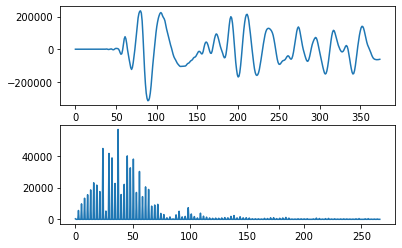

[ 60  90  45  50  55  35  70  80 110  95  85  25  40  75 105 100  20  65
 125 115 120  30  10   5  15 170 165 180 140 175 130 235 195 145 150   0
 155 135 200 160 220 210 245 230 315 215 340 225 270 205]


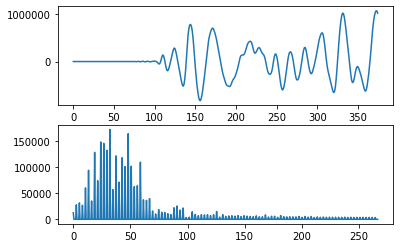

[ 60  90 100  75 115  50  70  35 120 125  40  25  45 105  80 150 140  20
  85 145 135 110  55  95  15 155  65  10 160  30 165 235   5 170 215 250
 220 130 230 180 175 330 205 305 270 225 240 275 335 315]


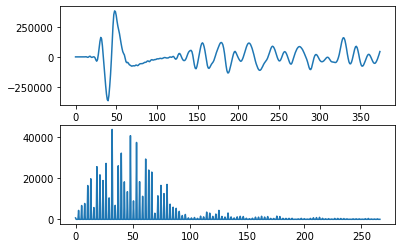

[ 60  50  35  75  25  45  40  30  15  85  20  10  80  65  70  55  90  95
 135   5 100 125 120 115 190 130 145 175 105 185 110 140 235 170   0 285
 180 255 165 150 240 295 160 215 200 250 230 245 205 335]


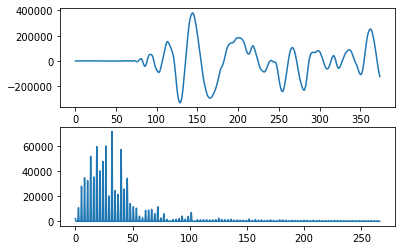

[ 40  65  30  55  20  45  50  25  80  75  10  15  60   5  85  95 130  35
 115 120 145  70 100 185 135 170 140 195 150 230 165 110 175 190 215 240
 200 250 225 220 345 205 160 295  90 430 255 335 435 180]


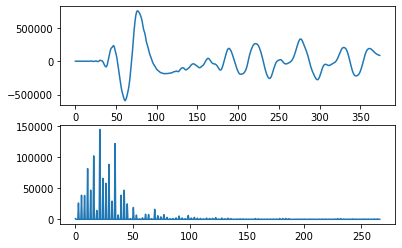

In [5]:
for i in range(5):
    X1 = x_LSTM[i,:,0]
    X1 = np.concatenate([X1,X1,X1,X1,X1])
    Y1 = np.fft.fft(X1)
    P1 = abs(Y1/(5*375))
    P1[2:-1] = 2*P1[2:-1]
    rank_X1 = np.argsort(P1[:500])[::-1][ :50]
    print(rank_X1)
    f = 1000*np.array(range(0,int(5*375)))/(5*375)
    plt.subplot(2,1,1)
    plt.plot(x_LSTM[i,:,0])
    plt.subplot(2,1,2)
    plt.plot(f[:500],P1[:500])
    plt.show()